In [1]:
def softmax(a):
    C = numpy.max(a)
    minus = a-C
    exp_a = numpy.exp(minus)
    sum_exp_a=numpy.sum(exp_a)
    y=exp_a/sum_exp_a
    return y

In [2]:
class neuralNetwork :
    def __init__(self,inputnodes,hiddennodes1,hideennodes2,outputnodes,learningrate):
        self.inodes=inputnodes
        self.hnodes1=hiddennodes1
        self.hnodes2=hideennodes2
        self.onodes=outputnodes
        
        self.lr=learningrate
        
        if self.hnodes1==0:
            self.wih=numpy.array(numpy.random.normal(0.0,pow(self.hnodes2,-0.5),(self.hnodes2,self.inodes)))
            self.who=numpy.array(numpy.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes2)))
        else:
            self.wih1=numpy.array(numpy.random.normal(0.0,pow(self.hnodes1,-0.5),(self.hnodes1,self.inodes)))
            self.wih2=numpy.array(numpy.random.normal(0.0,pow(self.hnodes2,-0.5),(self.hnodes2,self.hnodes1)))
            self.who=numpy.array(numpy.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes2)))  
        pass
            
        self.activation_function=lambda x:scipy.special.expit(x)
        self.activation_function2=lambda b:softmax(b)
        
    pass
    
    
    def train(self,inputs_list,targets_list,mode):
        inputs=numpy.array(inputs_list,ndmin=2).T
        targets=numpy.array(targets_list,ndmin=2).T
        
        if self.hnodes1==0:
            inputs=numpy.array(inputs_list,ndmin=2).T
            targets=numpy.array(targets_list,ndmin=2).T
        
            hidden_inputs=numpy.dot(self.wih,inputs)
            hidden_outputs=self.activation_function(hidden_inputs)
        
            final_inputs=numpy.dot(self.who,hidden_outputs)
            final_outputs=self.activation_function2(final_inputs)
        
            output_errors=targets-final_outputs
            hidden_errors=numpy.dot(self.who.T,output_errors)       
        
            self.wih+=self.lr*numpy.dot((hidden_errors*hidden_outputs*(1-hidden_outputs)),numpy.transpose(inputs))
            self.who+=self.lr*numpy.dot((output_errors*final_outputs*(1-final_outputs)),numpy.transpose(hidden_outputs))
               
        else:
            hidden_inputs1=numpy.dot(self.wih1,inputs)
            hidden_outputs1=self.activation_function(hidden_inputs1)
        
            hidden_inputs2=numpy.dot(self.wih2,hidden_outputs1)
            hidden_outputs2=self.activation_function(hidden_inputs2)
        
            final_inputs=numpy.dot(self.who,hidden_outputs2)
            final_outputs=self.activation_function2(final_inputs)
        
        
            output_errors=targets-final_outputs
            hidden_errors2=numpy.dot(self.who.T,output_errors)
            hidden_errors1=numpy.dot(self.wih2.T, hidden_errors2)
        
            self.wih1+=self.lr*numpy.dot((hidden_errors1*hidden_outputs1*(1-hidden_outputs1)),numpy.transpose(inputs))        
            self.wih2+=self.lr*numpy.dot((hidden_errors2*hidden_outputs2*(1-hidden_outputs2)),numpy.transpose(hidden_outputs1))        
            self.who+=self.lr*numpy.dot((output_errors*final_outputs*(1-final_outputs)),numpy.transpose(hidden_outputs2))
        pass
        
        
        
        if mode=='w':
            return self.wih,self.who
        elif mode == 'o':
            #return hidden_outputs,final_outputs
            return final_outputs
        elif mode =='e':
            return output_errors,hidden_errors
    
    
    def query(self,inputs_list):
        inputs=numpy.array(inputs_list,ndmin=2).T
        
        if self.hnodes1==0:
            hidden_inputs=numpy.dot(self.wih,inputs)        
            hidden_outputs=self.activation_function(hidden_inputs)
        
            final_inputs=numpy.dot(self.who,hidden_outputs)        
            final_outputs=self.activation_function2(final_inputs)
            
        else:
            hidden_inputs1=numpy.dot(self.wih1,inputs)
            hidden_outputs1=self.activation_function(hidden_inputs1)
        
            hidden_inputs2=numpy.dot(self.wih2,hidden_outputs1)
            hidden_outputs2=self.activation_function(hidden_inputs2)
        
            final_inputs=numpy.dot(self.who,hidden_outputs2)
            final_outputs=self.activation_function2(final_inputs)
        
        return final_outputs
     

In [3]:
import numpy
import matplotlib.pyplot as plt
import scipy.special

In [4]:
# 입력, 은닉, 출력 노드의 수
input_nodes = 2
hidden_nodes1= 10
hidden_nodes2 =2
output_nodes = 4
 
# 학습률
learning_rate = 0.2
 
# 신경망의 인스턴스를 생성
n = neuralNetwork(input_nodes, hidden_nodes1,hidden_nodes2, output_nodes, learning_rate)

# train csv 파일을 리스트로 불러오기
training_data_file = open("simple1.csv", 'r',encoding='utf-8-sig')
training_data_list = training_data_file.readlines()
training_data_file.close()


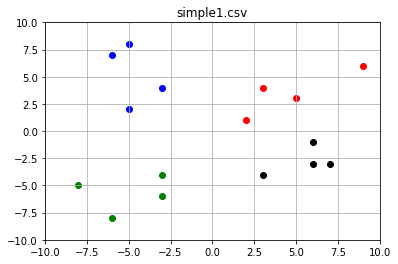

In [5]:

for record in training_data_list: 
    all_values = record.split(',')
    
    if(int(all_values[0])==1):
        plt.scatter(int(all_values[1]),int(all_values[2]),c='r')
    elif(int(all_values[0])==2):
        plt.scatter(int(all_values[1]),int(all_values[2]),c='b')
    elif(int(all_values[0])==3):
        plt.scatter(int(all_values[1]),int(all_values[2]),c='g')
    elif(int(all_values[0])==4):
        plt.scatter(int(all_values[1]),int(all_values[2]),c='k')
    pass

pass

plt.xlim([-10,10])
plt.ylim([-10,10])
plt.title('simple1.csv')
plt.grid()


1 번째


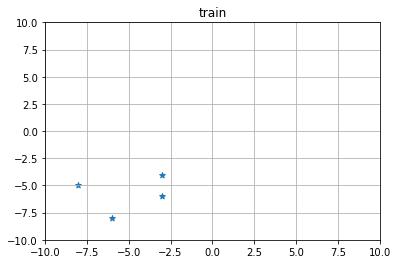

학습률 :  25.0 %
2 번째


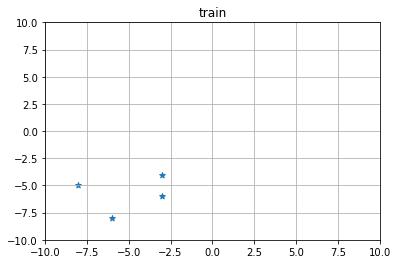

학습률 :  25.0 %
3 번째


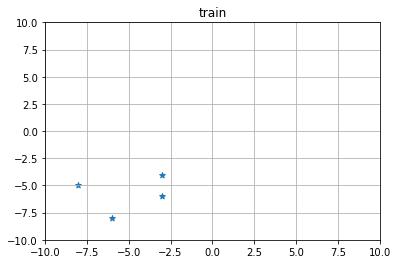

학습률 :  25.0 %
4 번째


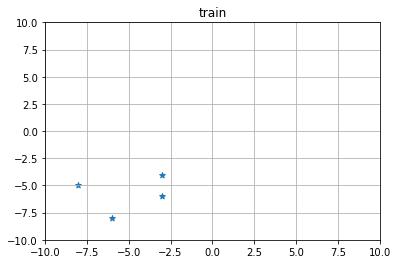

학습률 :  25.0 %
5 번째


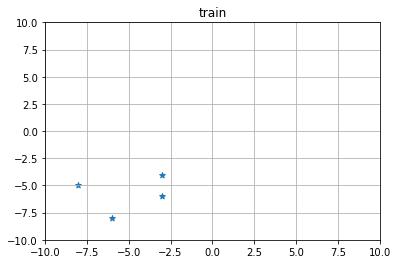

학습률 :  25.0 %
6 번째


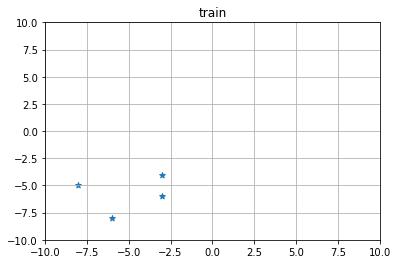

학습률 :  25.0 %
7 번째


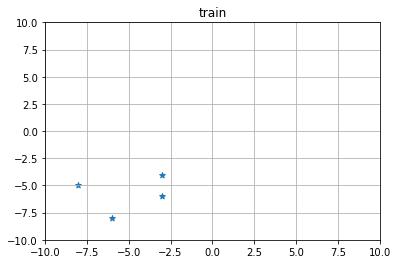

학습률 :  25.0 %
8 번째


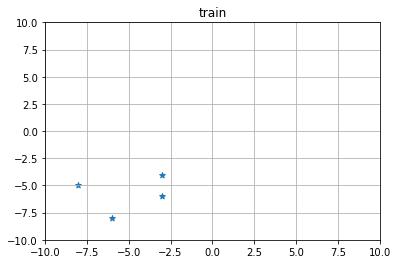

학습률 :  25.0 %
9 번째


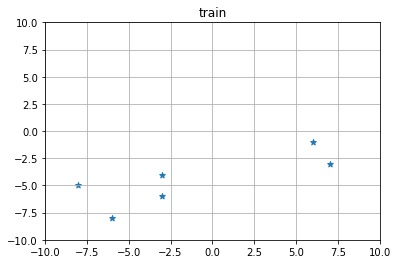

학습률 :  37.5 %
10 번째


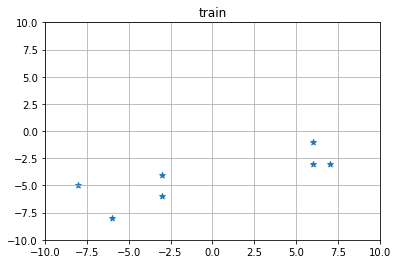

학습률 :  43.75 %
11 번째


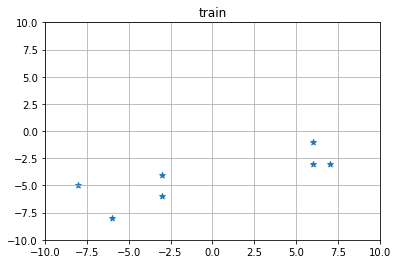

학습률 :  43.75 %
12 번째


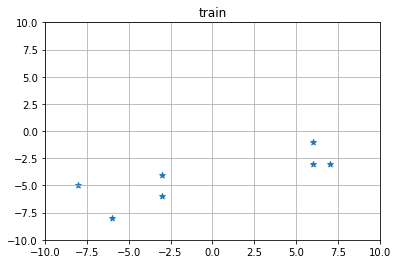

학습률 :  43.75 %
13 번째


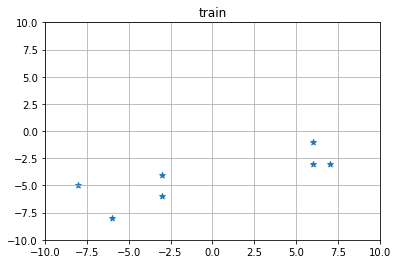

학습률 :  43.75 %
14 번째


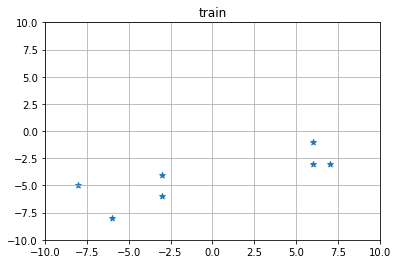

학습률 :  43.75 %
15 번째


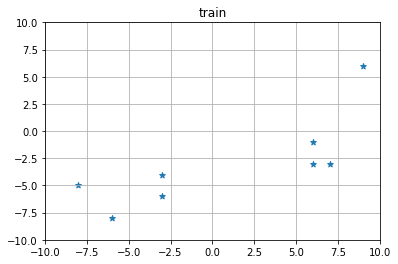

학습률 :  50.0 %
16 번째


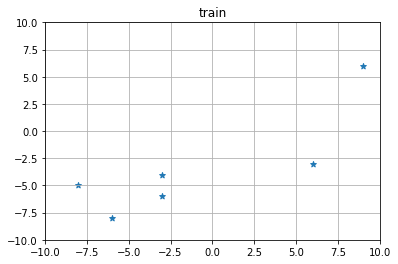

학습률 :  37.5 %
17 번째


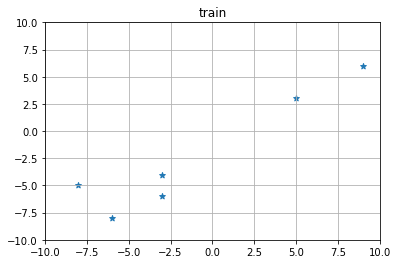

학습률 :  37.5 %
18 번째


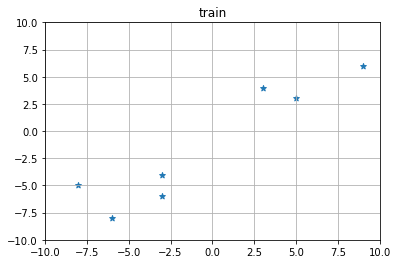

학습률 :  43.75 %
19 번째


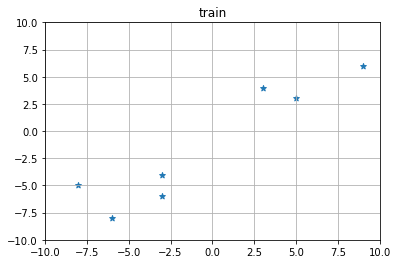

학습률 :  43.75 %
20 번째


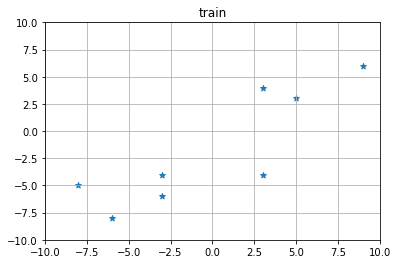

학습률 :  50.0 %
21 번째


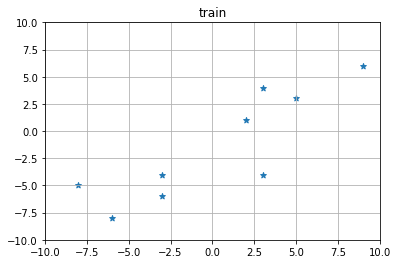

학습률 :  56.25 %
22 번째


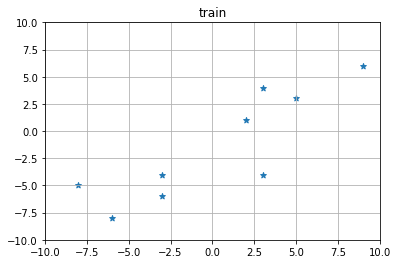

학습률 :  56.25 %
23 번째


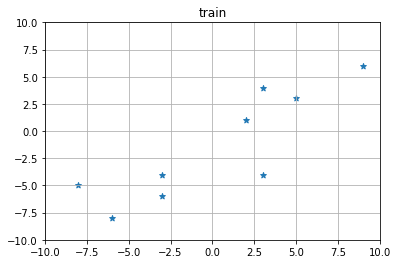

학습률 :  56.25 %
24 번째


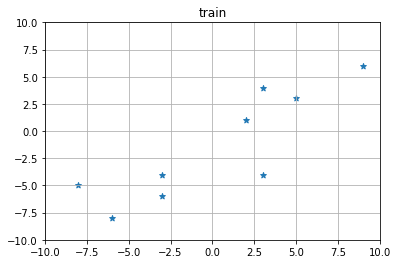

학습률 :  56.25 %
25 번째


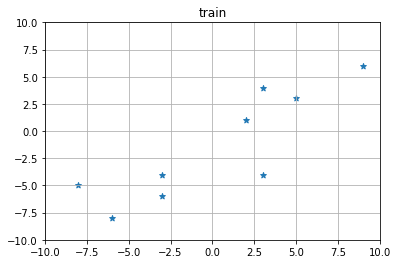

학습률 :  56.25 %
26 번째


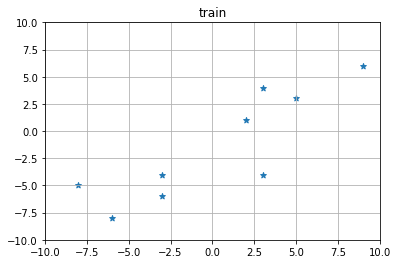

학습률 :  56.25 %
27 번째


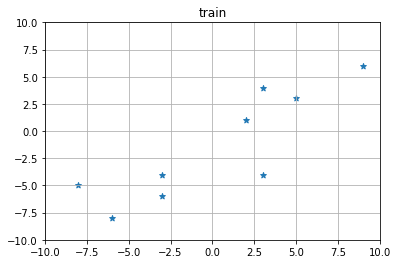

학습률 :  56.25 %
28 번째


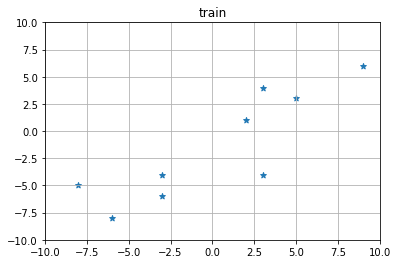

학습률 :  56.25 %
29 번째


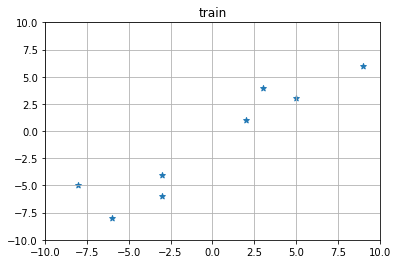

학습률 :  50.0 %
30 번째


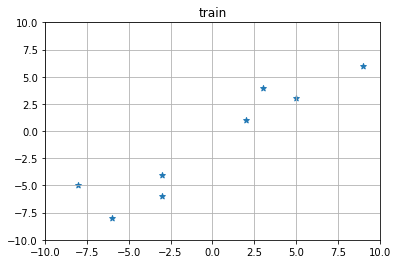

학습률 :  50.0 %
31 번째


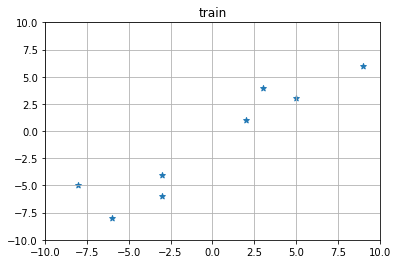

학습률 :  50.0 %
32 번째


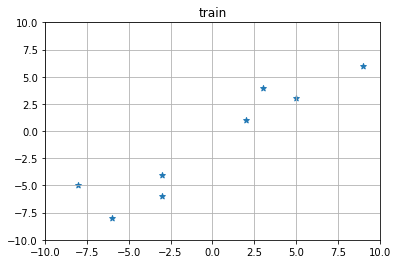

학습률 :  50.0 %
33 번째


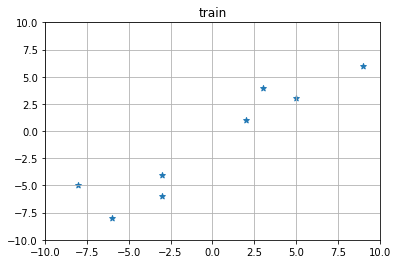

학습률 :  50.0 %
34 번째


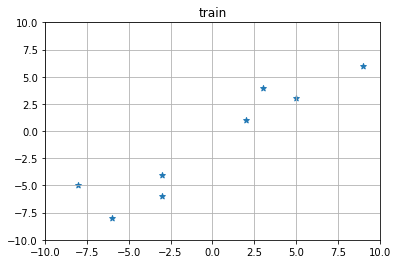

학습률 :  50.0 %
35 번째


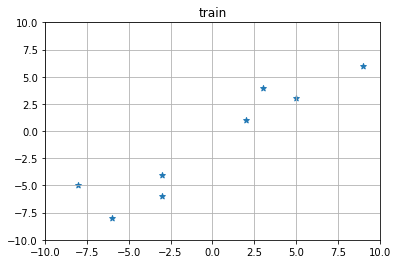

학습률 :  50.0 %
36 번째


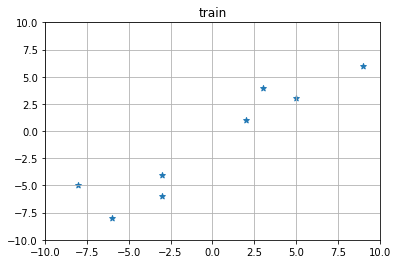

학습률 :  50.0 %
37 번째


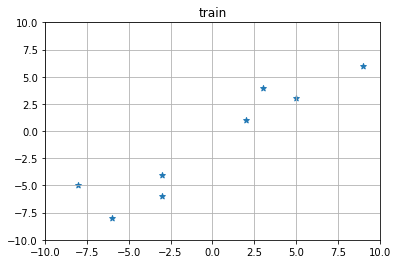

학습률 :  50.0 %
38 번째


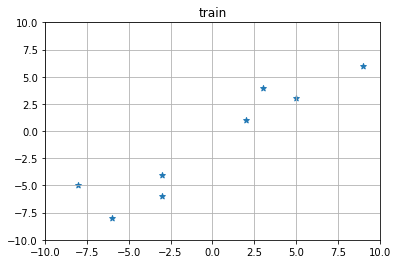

학습률 :  50.0 %
39 번째


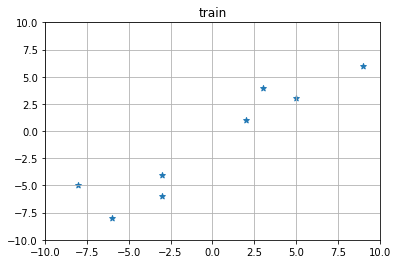

학습률 :  50.0 %
40 번째


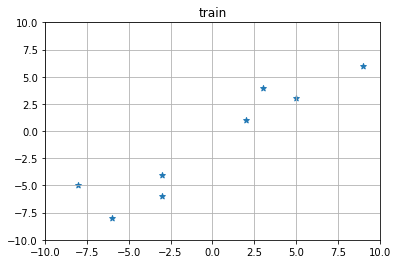

학습률 :  50.0 %
41 번째


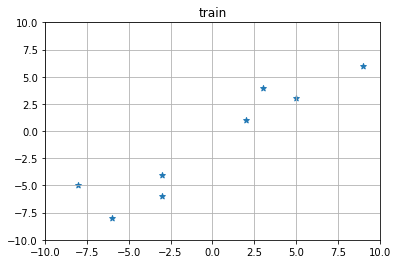

학습률 :  50.0 %
42 번째


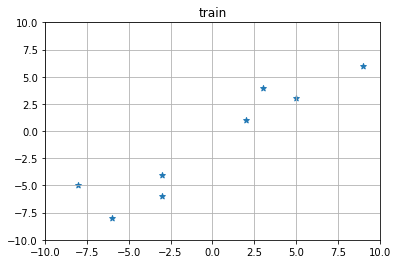

학습률 :  50.0 %
43 번째


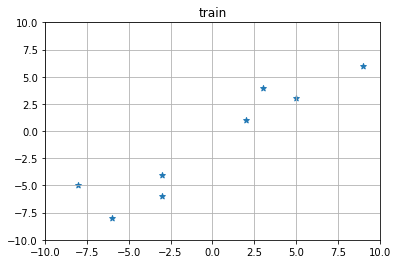

학습률 :  50.0 %
44 번째


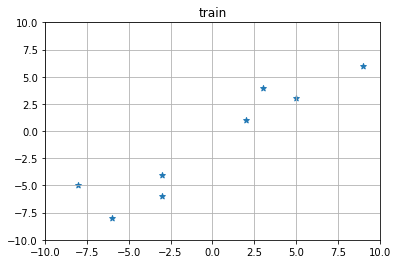

학습률 :  50.0 %
45 번째


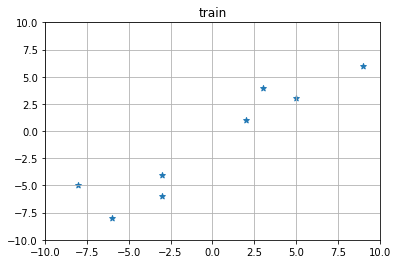

학습률 :  50.0 %
46 번째


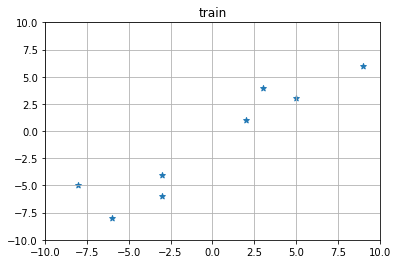

학습률 :  50.0 %
47 번째


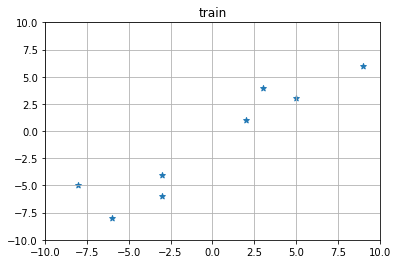

학습률 :  50.0 %
48 번째


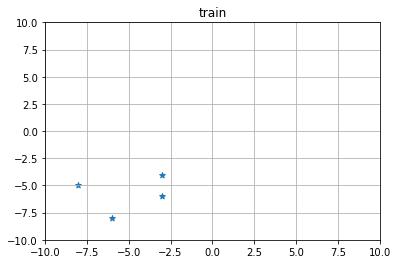

학습률 :  25.0 %
49 번째


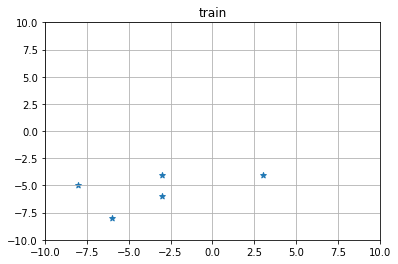

학습률 :  31.25 %
50 번째


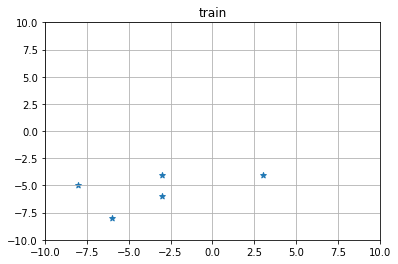

학습률 :  31.25 %
51 번째


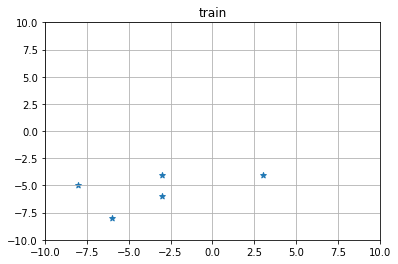

학습률 :  31.25 %
52 번째


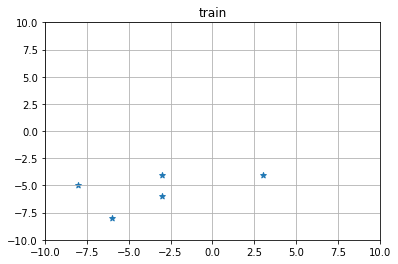

학습률 :  31.25 %
53 번째


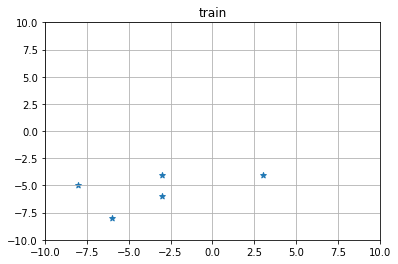

학습률 :  31.25 %
54 번째


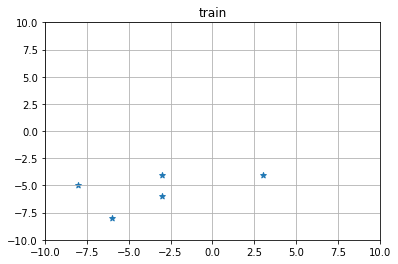

학습률 :  31.25 %
55 번째


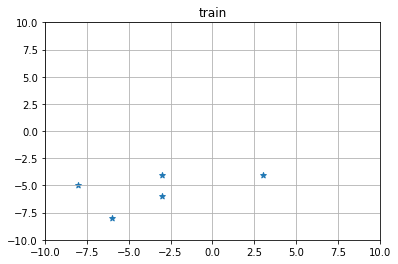

학습률 :  31.25 %
56 번째


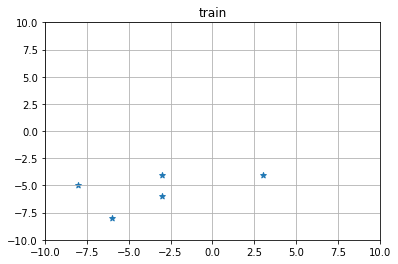

학습률 :  31.25 %
57 번째


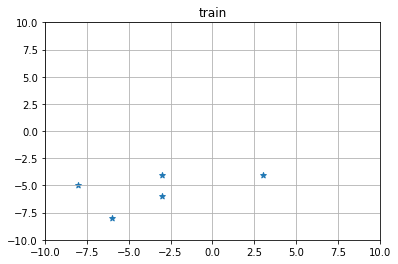

학습률 :  31.25 %
58 번째


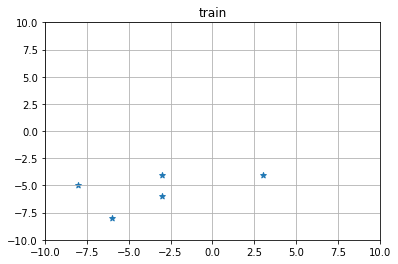

학습률 :  31.25 %
59 번째


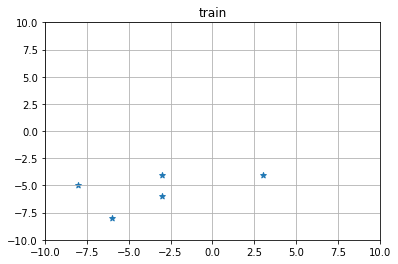

학습률 :  31.25 %
60 번째


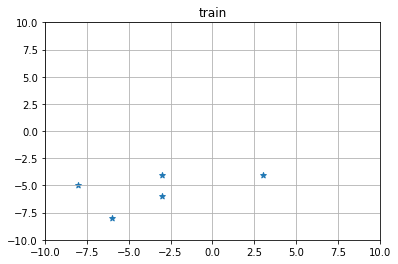

학습률 :  31.25 %
61 번째


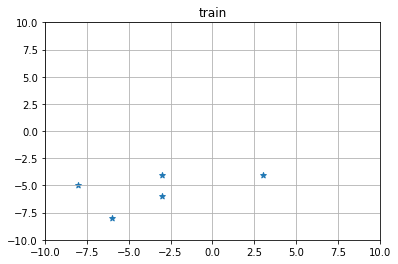

학습률 :  31.25 %
62 번째


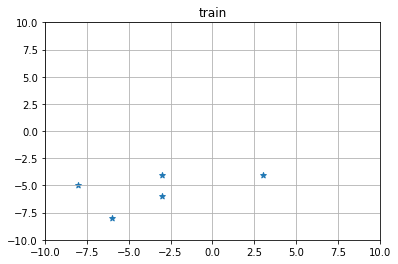

학습률 :  31.25 %
63 번째


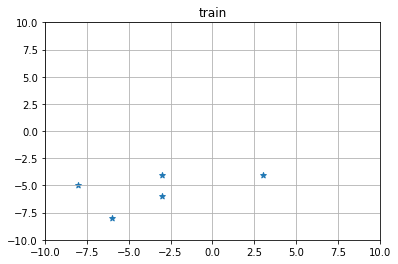

학습률 :  31.25 %
64 번째


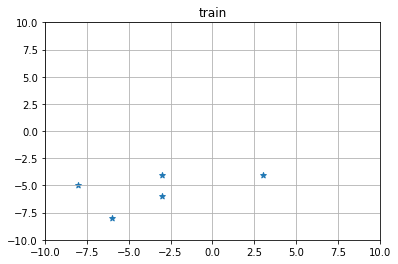

학습률 :  31.25 %
65 번째


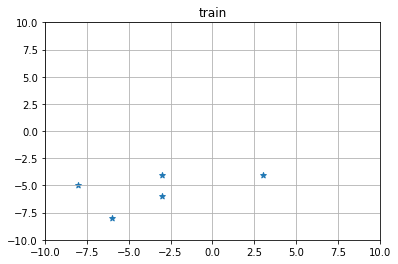

학습률 :  31.25 %
66 번째


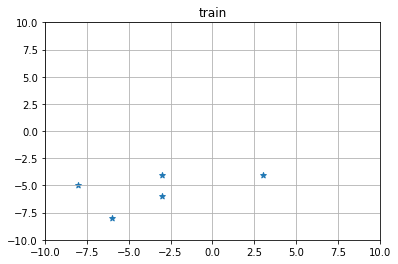

학습률 :  31.25 %
67 번째


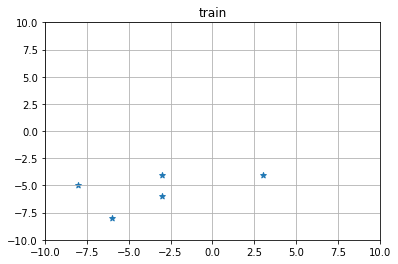

학습률 :  31.25 %
68 번째


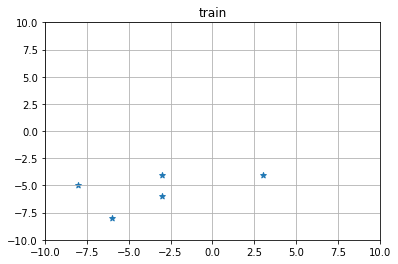

학습률 :  31.25 %
69 번째


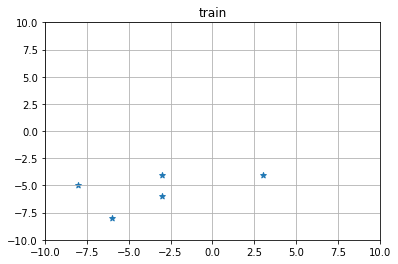

학습률 :  31.25 %
70 번째


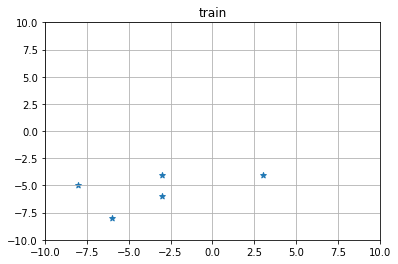

학습률 :  31.25 %
71 번째


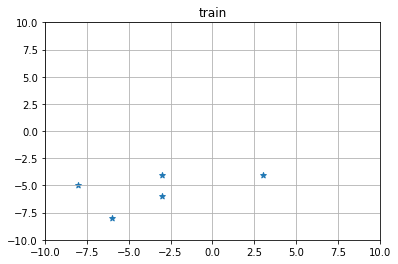

학습률 :  31.25 %
72 번째


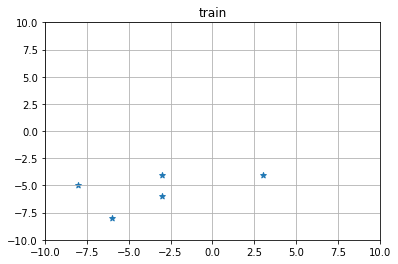

학습률 :  31.25 %
73 번째


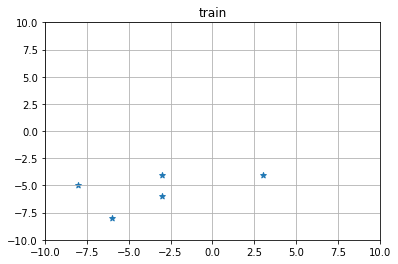

학습률 :  31.25 %
74 번째


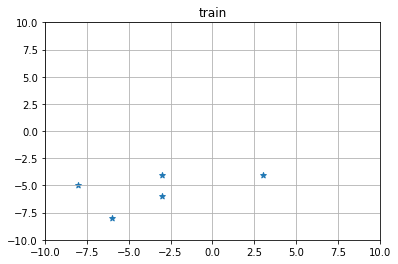

학습률 :  31.25 %
75 번째


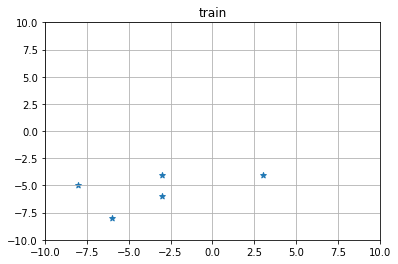

학습률 :  31.25 %
76 번째


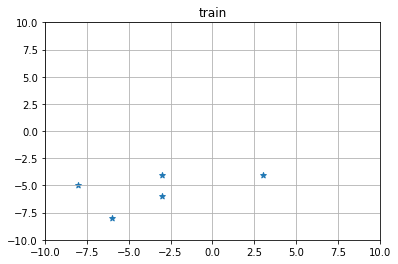

학습률 :  31.25 %
77 번째


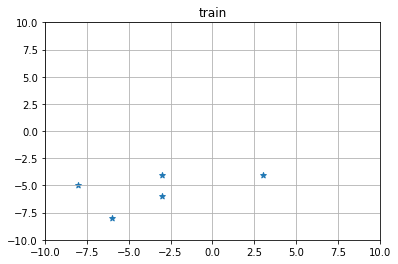

학습률 :  31.25 %
78 번째


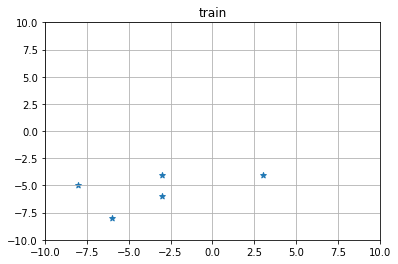

학습률 :  31.25 %
79 번째


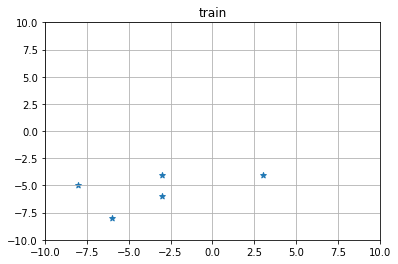

학습률 :  31.25 %
80 번째


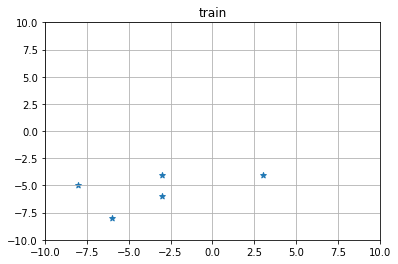

학습률 :  31.25 %
81 번째


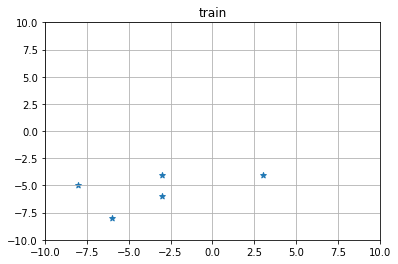

학습률 :  31.25 %
82 번째


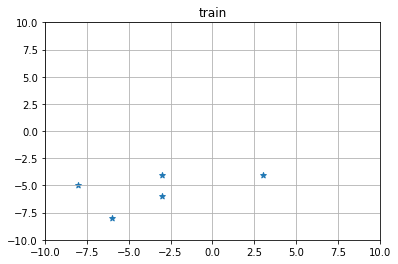

학습률 :  31.25 %
83 번째


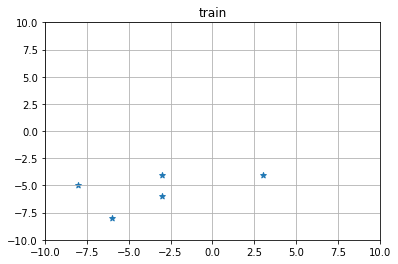

학습률 :  31.25 %
84 번째


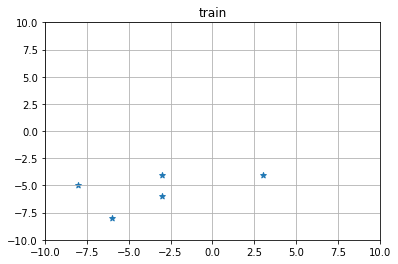

학습률 :  31.25 %
85 번째


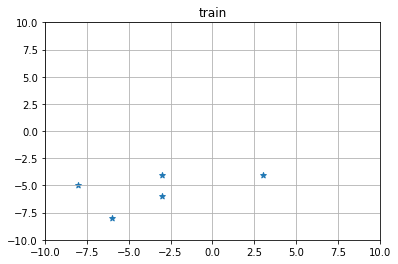

학습률 :  31.25 %
86 번째


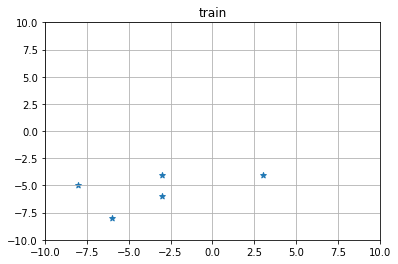

학습률 :  31.25 %
87 번째


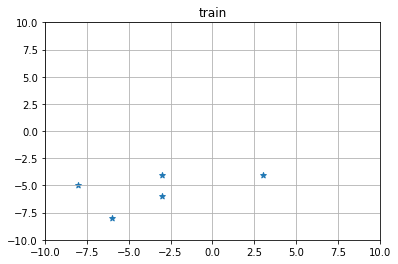

학습률 :  31.25 %
88 번째


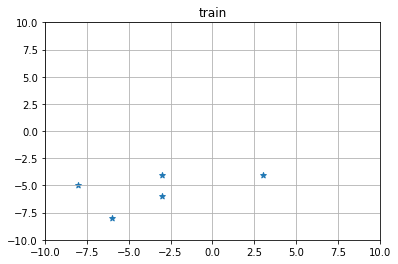

학습률 :  31.25 %
89 번째


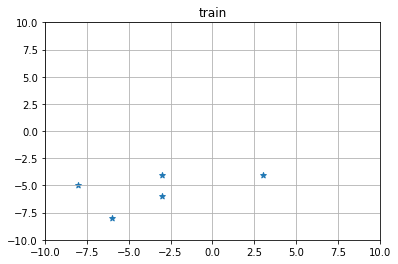

학습률 :  31.25 %
90 번째


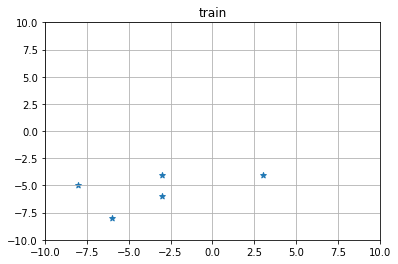

학습률 :  31.25 %
91 번째


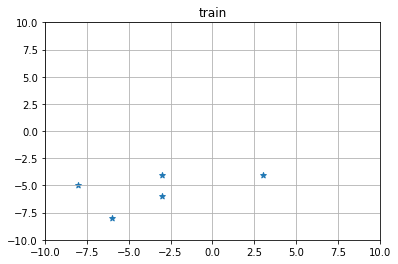

학습률 :  31.25 %
92 번째


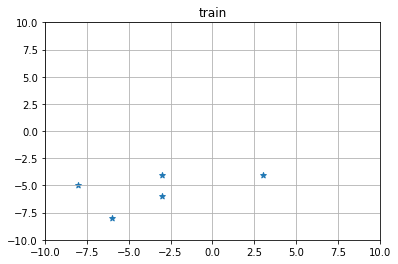

학습률 :  31.25 %
93 번째


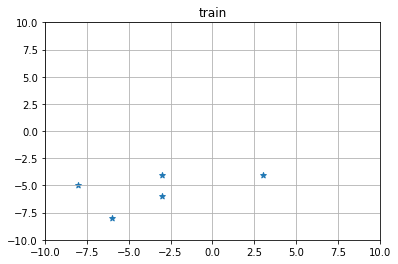

학습률 :  31.25 %
94 번째


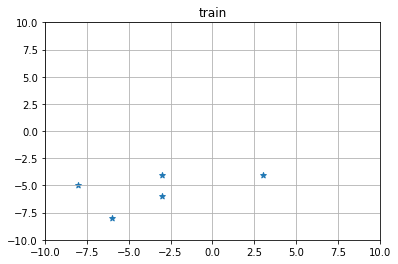

학습률 :  31.25 %
95 번째


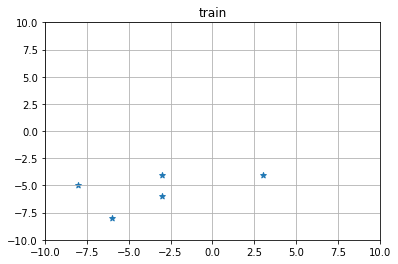

학습률 :  31.25 %
96 번째


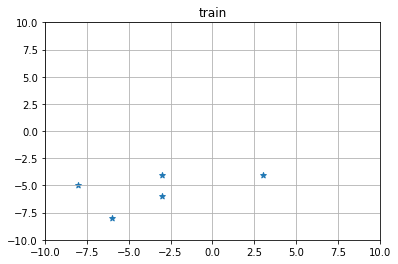

학습률 :  31.25 %
97 번째


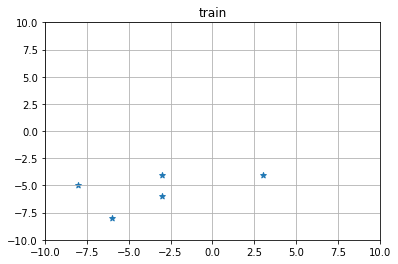

학습률 :  31.25 %
98 번째


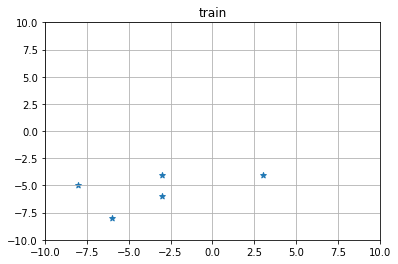

학습률 :  31.25 %
99 번째


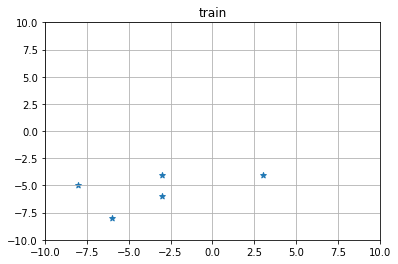

학습률 :  31.25 %
100 번째


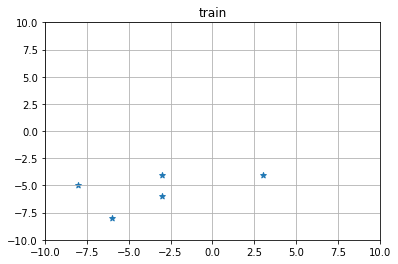

학습률 :  31.25 %
101 번째


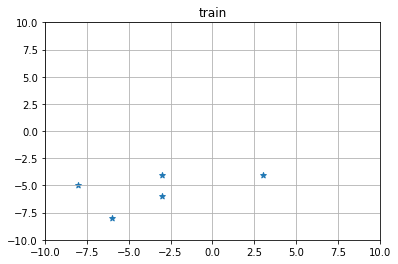

학습률 :  31.25 %
102 번째


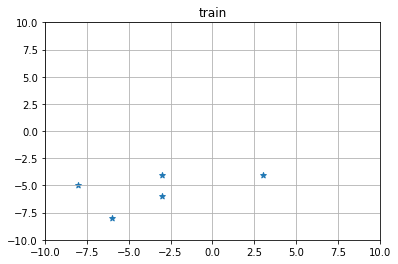

학습률 :  31.25 %
103 번째


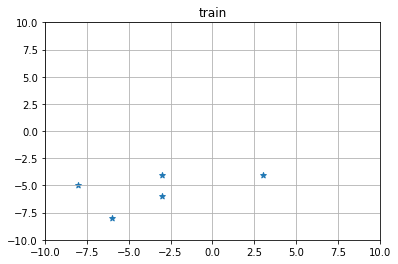

학습률 :  31.25 %
104 번째


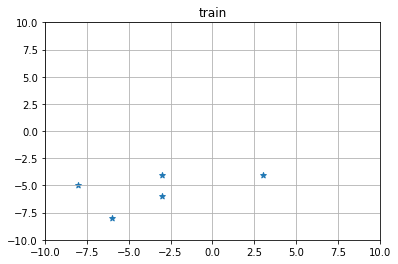

학습률 :  31.25 %
105 번째


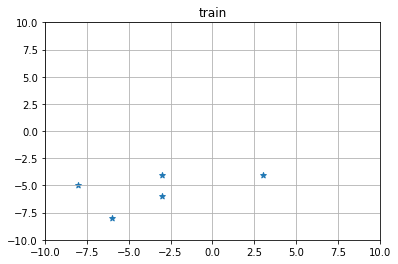

학습률 :  31.25 %
106 번째


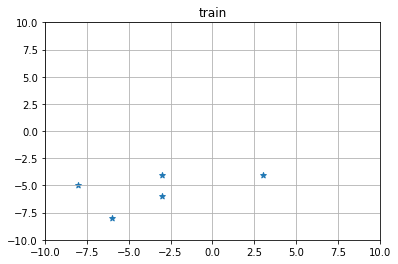

학습률 :  31.25 %
107 번째


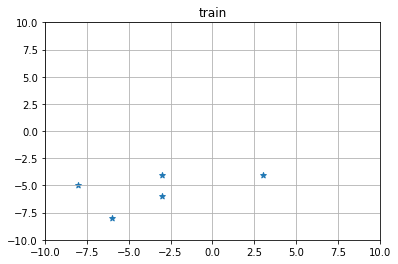

학습률 :  31.25 %
108 번째


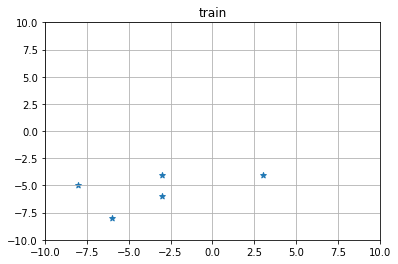

학습률 :  31.25 %
109 번째


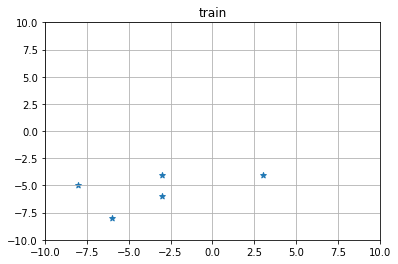

학습률 :  31.25 %
110 번째


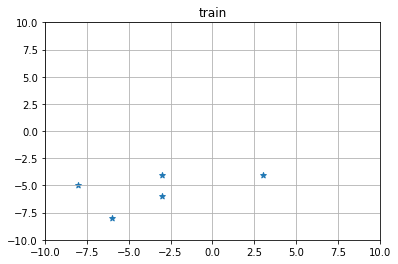

학습률 :  31.25 %
111 번째


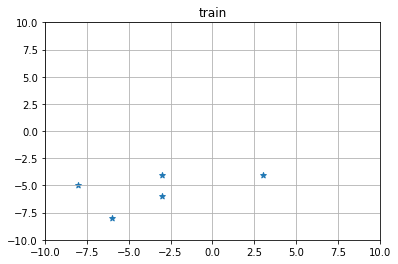

학습률 :  31.25 %
112 번째


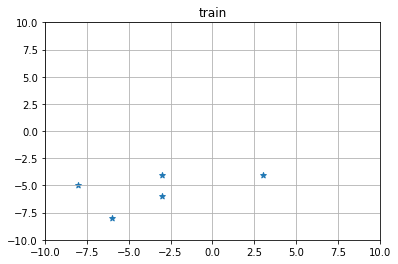

학습률 :  31.25 %
113 번째


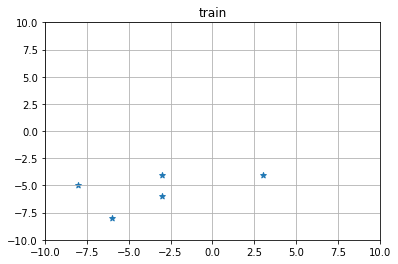

학습률 :  31.25 %
114 번째


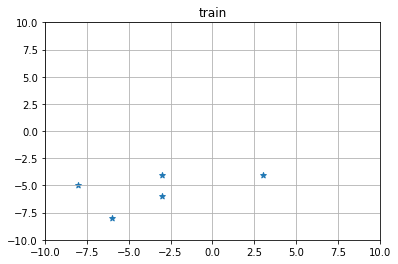

학습률 :  31.25 %
115 번째


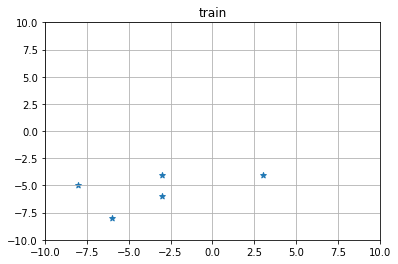

학습률 :  31.25 %
116 번째


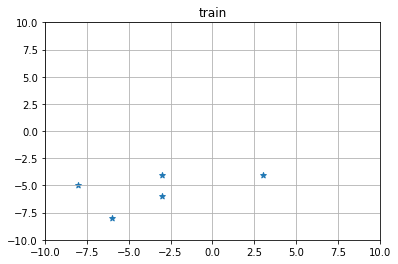

학습률 :  31.25 %
117 번째


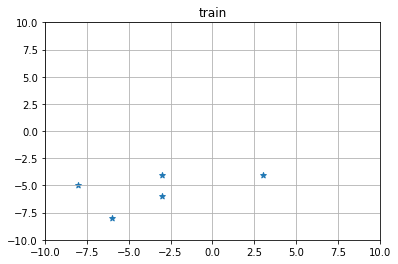

학습률 :  31.25 %
118 번째


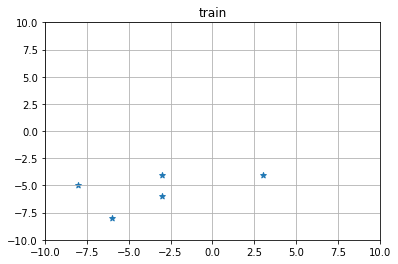

학습률 :  31.25 %
119 번째


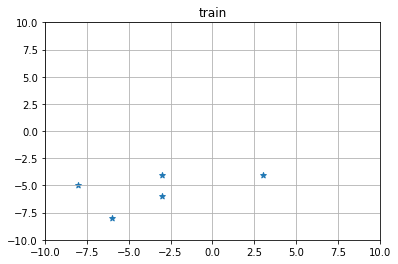

학습률 :  31.25 %
120 번째


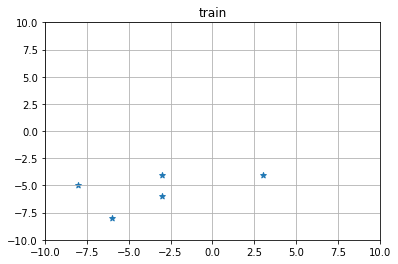

학습률 :  31.25 %
121 번째


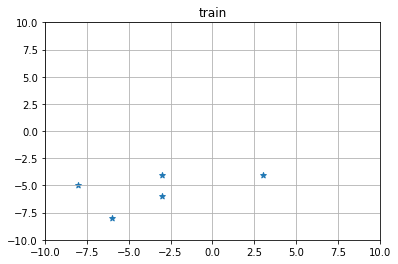

학습률 :  31.25 %
122 번째


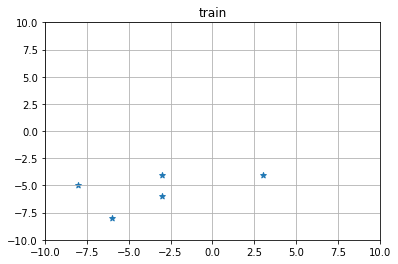

학습률 :  31.25 %
123 번째


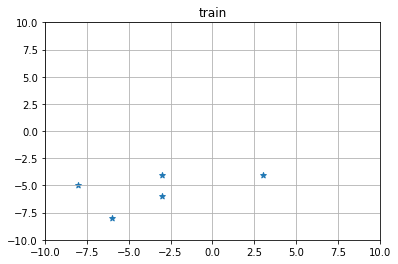

학습률 :  31.25 %
124 번째


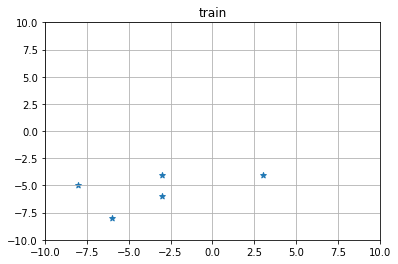

학습률 :  31.25 %
125 번째


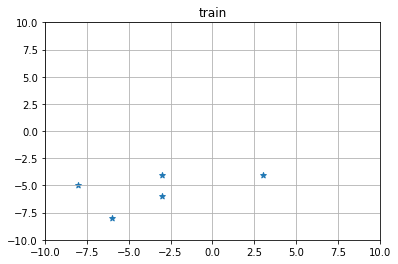

학습률 :  31.25 %
126 번째


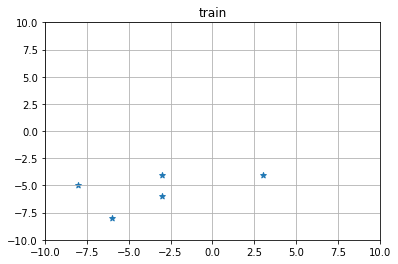

학습률 :  31.25 %
127 번째


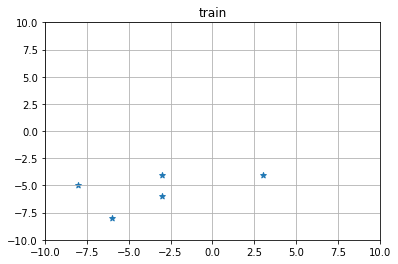

학습률 :  31.25 %
128 번째


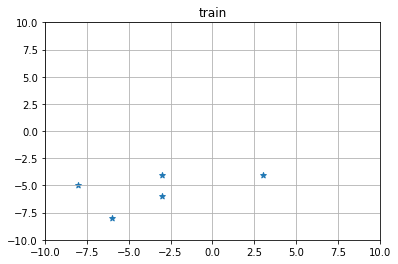

학습률 :  31.25 %
129 번째


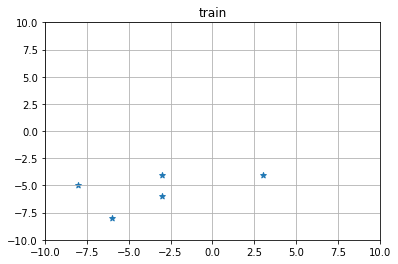

학습률 :  31.25 %
130 번째


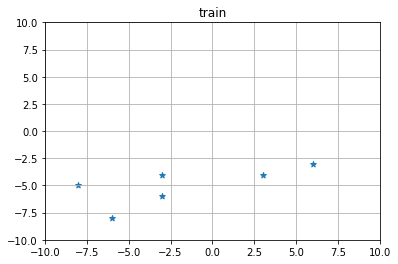

학습률 :  37.5 %
131 번째


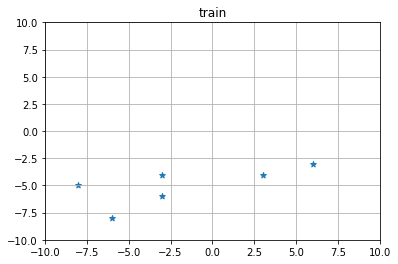

학습률 :  37.5 %
132 번째


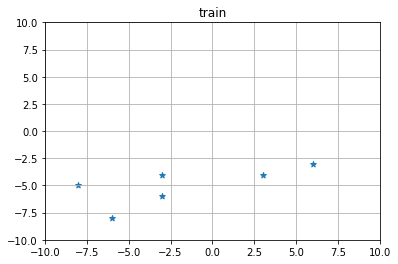

학습률 :  37.5 %
133 번째


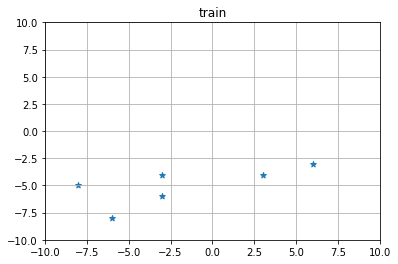

학습률 :  37.5 %
134 번째


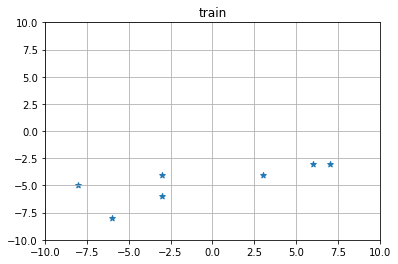

학습률 :  43.75 %
135 번째


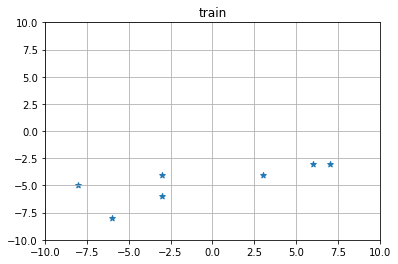

학습률 :  43.75 %
136 번째


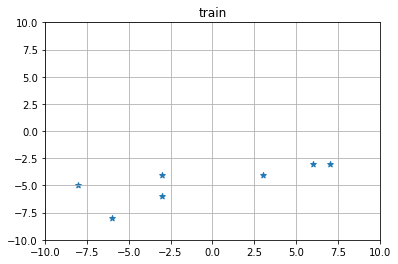

학습률 :  43.75 %
137 번째


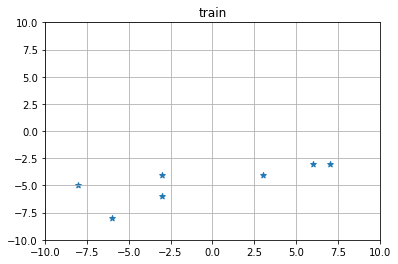

학습률 :  43.75 %
138 번째


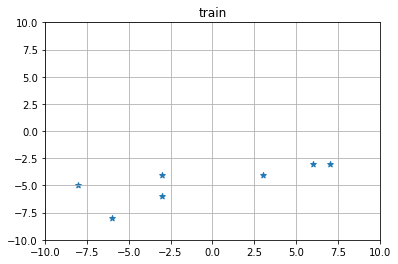

학습률 :  43.75 %
139 번째


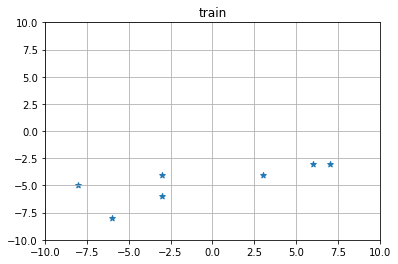

학습률 :  43.75 %
140 번째


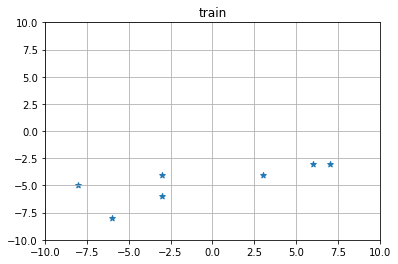

학습률 :  43.75 %
141 번째


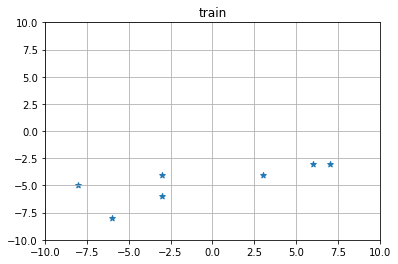

학습률 :  43.75 %
142 번째


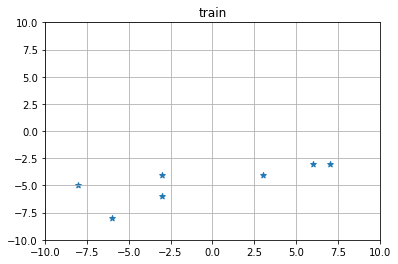

학습률 :  43.75 %
143 번째


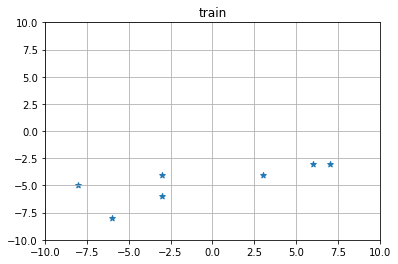

학습률 :  43.75 %
144 번째


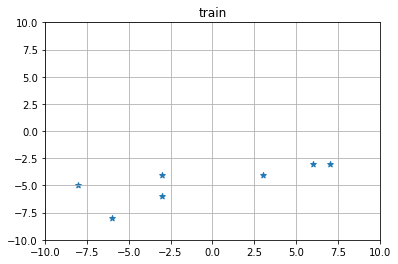

학습률 :  43.75 %
145 번째


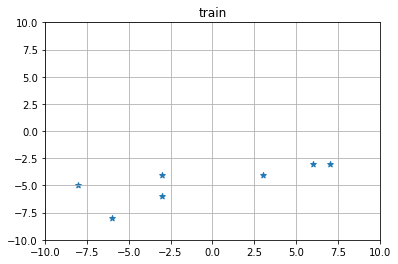

학습률 :  43.75 %
146 번째


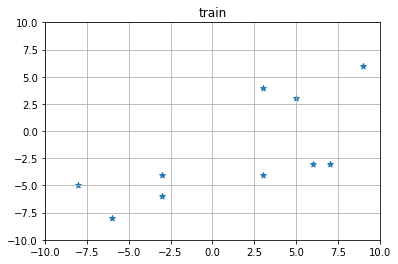

학습률 :  62.5 %
147 번째


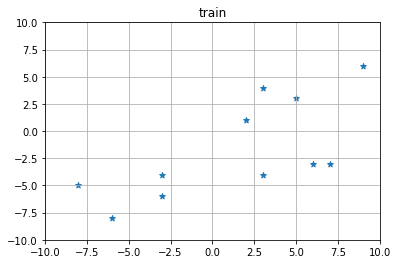

학습률 :  68.75 %
148 번째


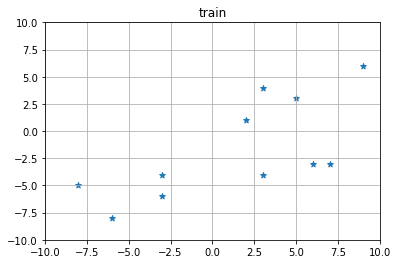

학습률 :  68.75 %
149 번째


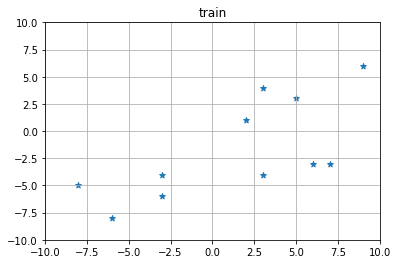

학습률 :  68.75 %
150 번째


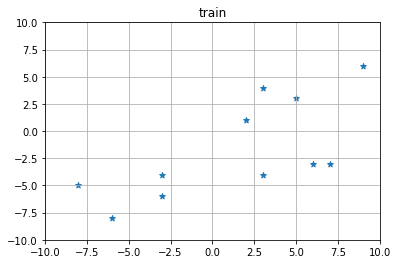

학습률 :  68.75 %
151 번째


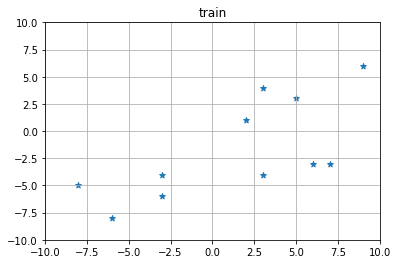

학습률 :  68.75 %
152 번째


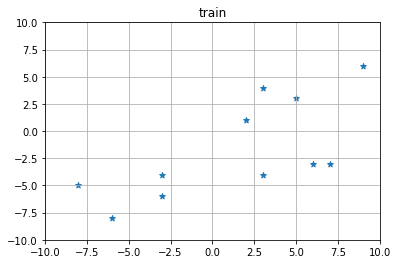

학습률 :  68.75 %
153 번째


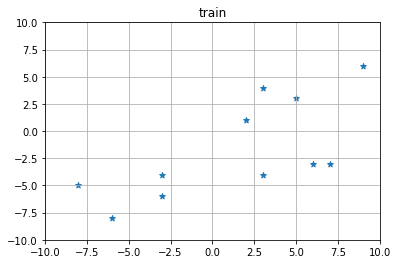

학습률 :  68.75 %
154 번째


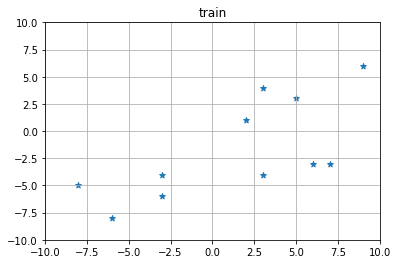

학습률 :  68.75 %
155 번째


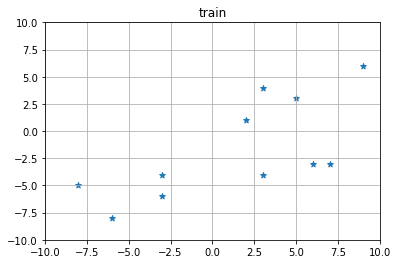

학습률 :  68.75 %
156 번째


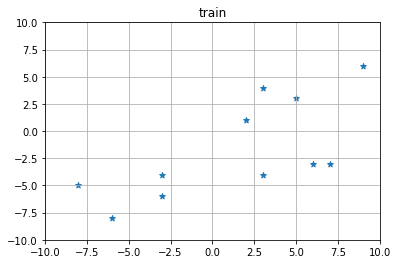

학습률 :  68.75 %
157 번째


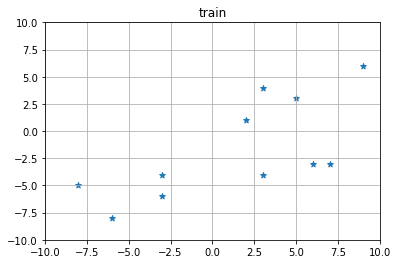

학습률 :  68.75 %
158 번째


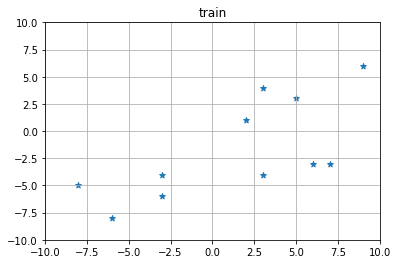

학습률 :  68.75 %
159 번째


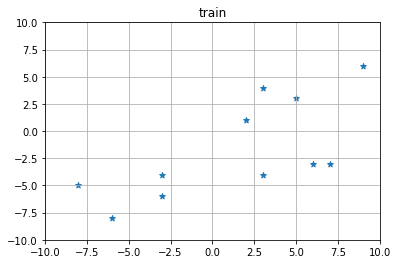

학습률 :  68.75 %
160 번째


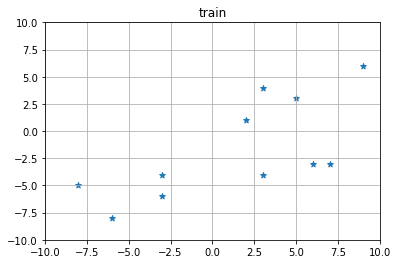

학습률 :  68.75 %
161 번째


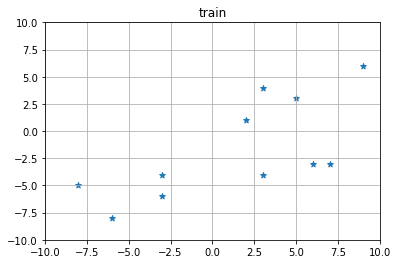

학습률 :  68.75 %
162 번째


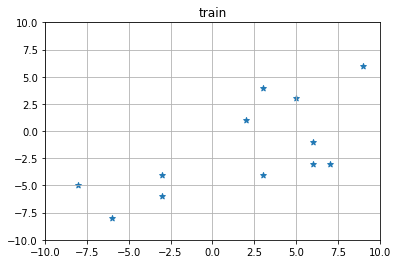

학습률 :  75.0 %
163 번째


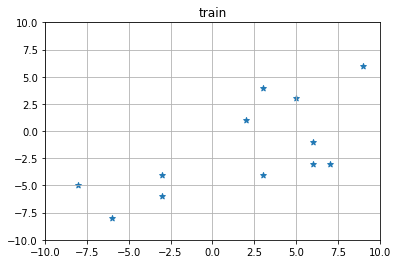

학습률 :  75.0 %
164 번째


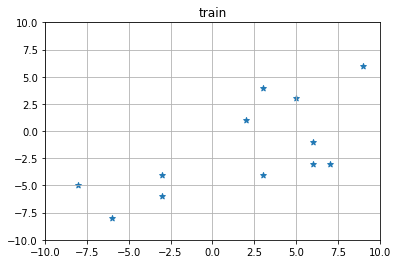

학습률 :  75.0 %
165 번째


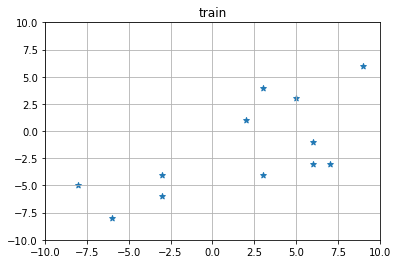

학습률 :  75.0 %
166 번째


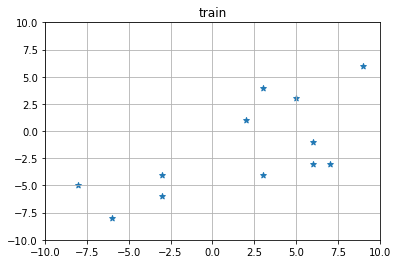

학습률 :  75.0 %
167 번째


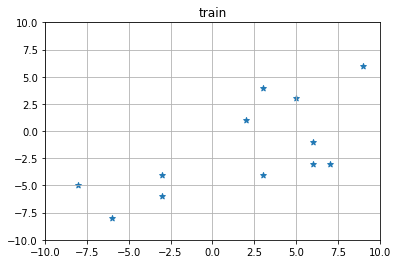

학습률 :  75.0 %
168 번째


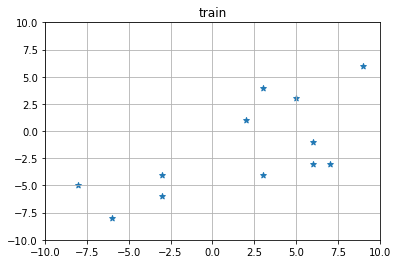

학습률 :  75.0 %
169 번째


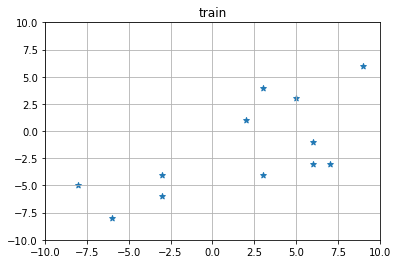

학습률 :  75.0 %
170 번째


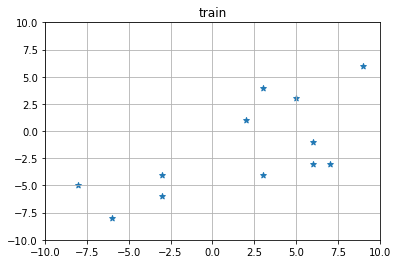

학습률 :  75.0 %
171 번째


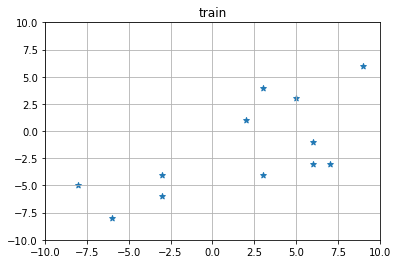

학습률 :  75.0 %
172 번째


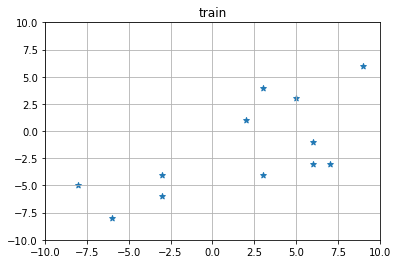

학습률 :  75.0 %
173 번째


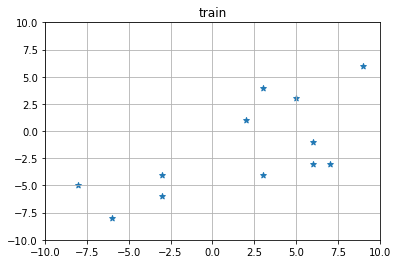

학습률 :  75.0 %
174 번째


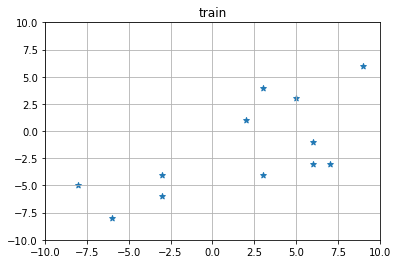

학습률 :  75.0 %
175 번째


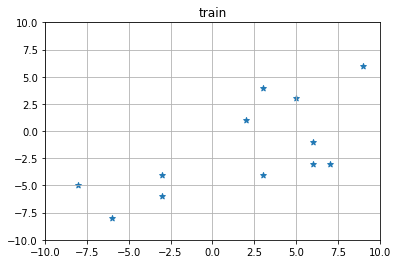

학습률 :  75.0 %
176 번째


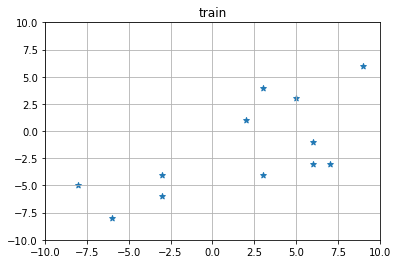

학습률 :  75.0 %
177 번째


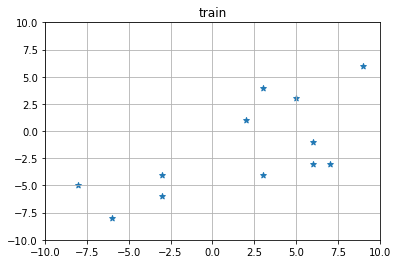

학습률 :  75.0 %
178 번째


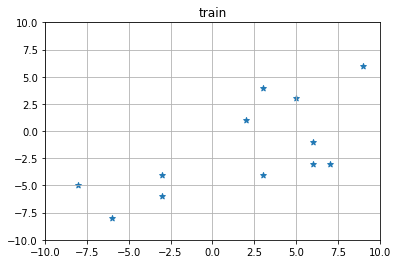

학습률 :  75.0 %
179 번째


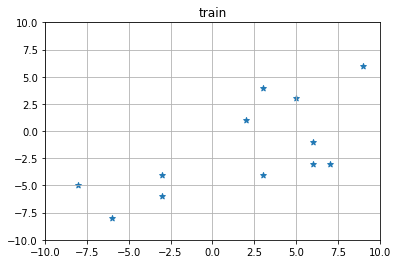

학습률 :  75.0 %
180 번째


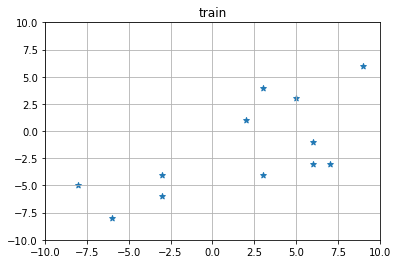

학습률 :  75.0 %
181 번째


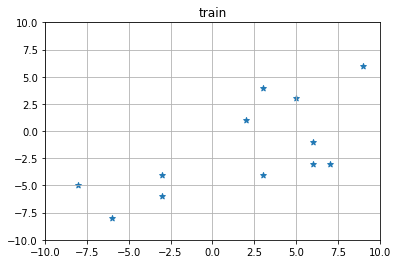

학습률 :  75.0 %
182 번째


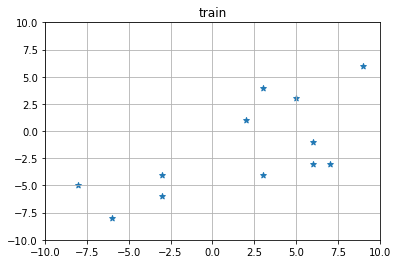

학습률 :  75.0 %
183 번째


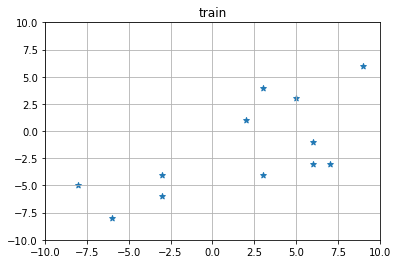

학습률 :  75.0 %
184 번째


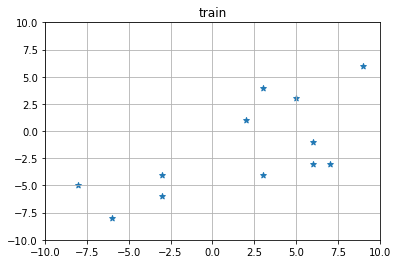

학습률 :  75.0 %
185 번째


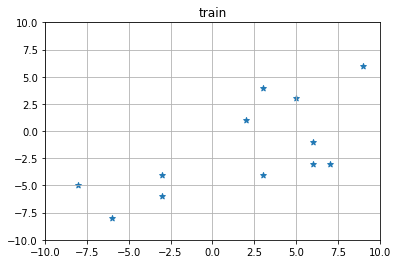

학습률 :  75.0 %
186 번째


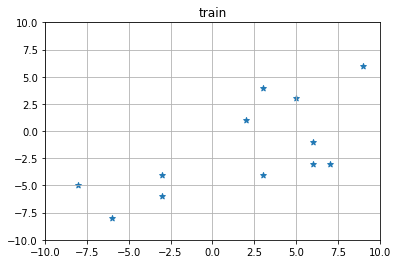

학습률 :  75.0 %
187 번째


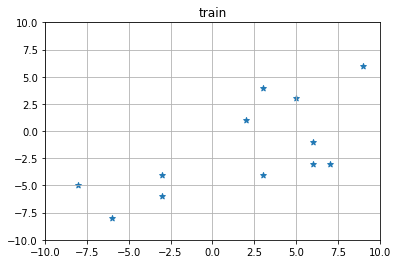

학습률 :  75.0 %
188 번째


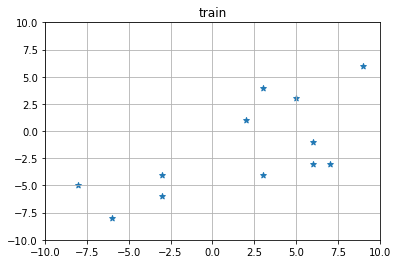

학습률 :  75.0 %
189 번째


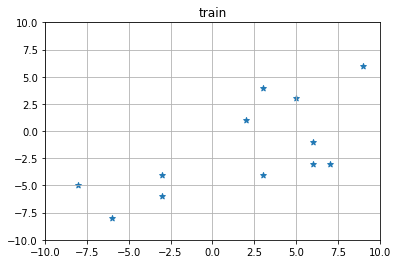

학습률 :  75.0 %
190 번째


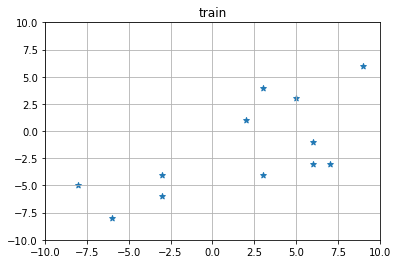

학습률 :  75.0 %
191 번째


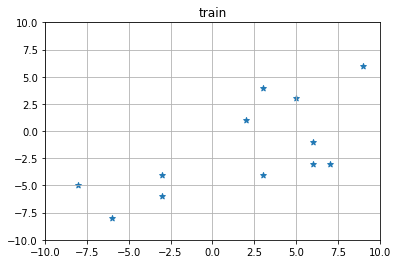

학습률 :  75.0 %
192 번째


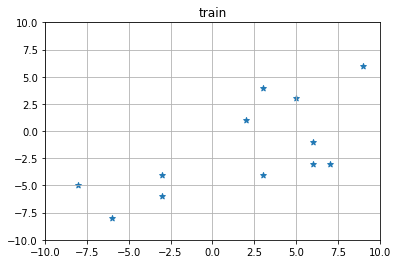

학습률 :  75.0 %
193 번째


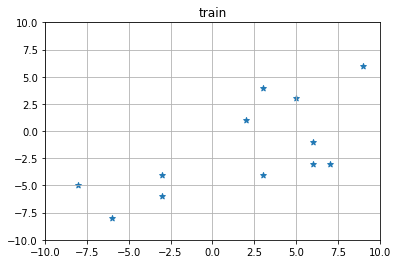

학습률 :  75.0 %
194 번째


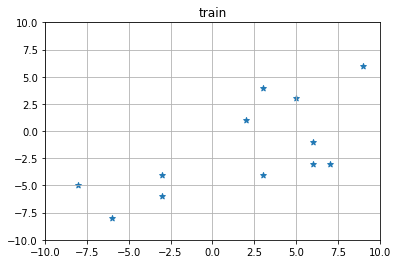

학습률 :  75.0 %
195 번째


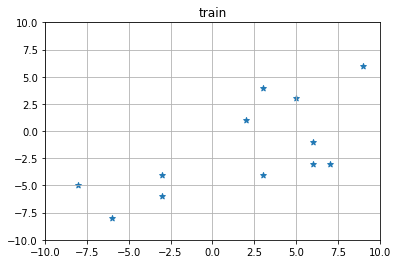

학습률 :  75.0 %
196 번째


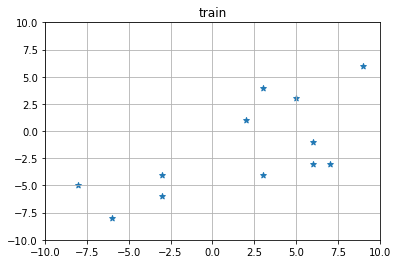

학습률 :  75.0 %
197 번째


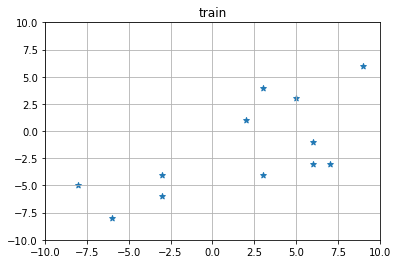

학습률 :  75.0 %
198 번째


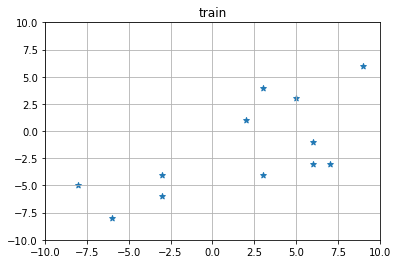

학습률 :  75.0 %
199 번째


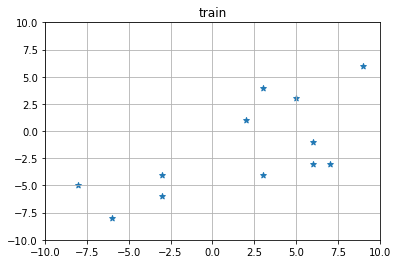

학습률 :  75.0 %
200 번째


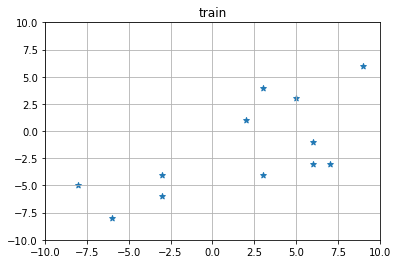

학습률 :  75.0 %


In [6]:
# 신경망 학습시키기
 
epochs = 200
Acc=[]

for e in range(epochs):
    accuracy=[]
    correct_x=[]
    correct_y=[]
    print(e+1,'번째')
    for record in training_data_list:        
        all_values = record.split(',') # 레코드를 쉼표에 의해 분리
        
        # 입력 값의 범위와 값 조정
        inputs = numpy.asfarray(all_values[1:3])/10 +0.01    
        # 결과 값 생성 (실제 값인 0.99 외에는 모두 0.01)
        targets = numpy.zeros(n.onodes)+0.01
        # all_values[0]은 이 레코드에 대한 결과 값
        targets[int(all_values[0])-1] = 0.99
        
        if ((int(all_values[0])-1)==numpy.argmax(n.train(inputs, targets,'o'))):
            accuracy.append(1)
            correct_x.append(int(all_values[1]))
            correct_y.append(int(all_values[2]))
            
        else:
            accuracy.append(0)
            pass       
        
    
        #print(targets)
        #print(n.train(inputs, targets,'o'))        
        

       
    plt.scatter(correct_x,correct_y,marker='*')
    plt.xlim([-10,10])
    plt.ylim([-10,10]) 
    plt.title('train')
    plt.grid()
    plt.show()
    #print(correct_x,correct_y)
    
   

    accuracy_array=numpy.asarray(accuracy)
    Acc.append(accuracy_array.sum()/len(training_data_list)*100)
    print('학습률 : ',accuracy_array.sum()/len(training_data_list)*100,'%')
    


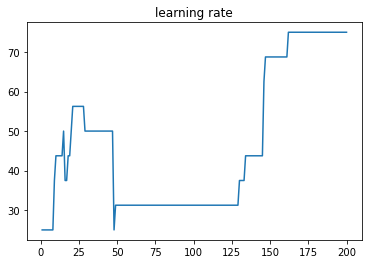

In [7]:
x = numpy.arange(1,epochs+1)
plt.title('learning rate')
plt.plot(x,Acc)


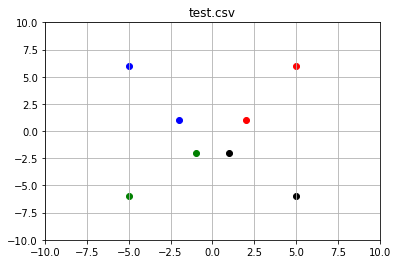

In [8]:
# test

test_data_file = open("test.csv", 'r', encoding='utf-8-sig')
test_data_list = test_data_file.readlines()
test_data_file.close()

for record in test_data_list: 
    all_values1 = record.split(',')
    
    if(int(all_values1[0])==1):
        plt.scatter(int(all_values1[1]),int(all_values1[2]),c='r')
    elif(int(all_values1[0])==2):
        plt.scatter(int(all_values1[1]),int(all_values1[2]),c='b')
    elif(int(all_values1[0])==3):
        plt.scatter(int(all_values1[1]),int(all_values1[2]),c='g')
    elif(int(all_values1[0])==4):
        plt.scatter(int(all_values1[1]),int(all_values1[2]),c='k')
    pass

pass

plt.xlim([-10,10])
plt.ylim([-10,10])
plt.title('test.csv')
plt.grid()

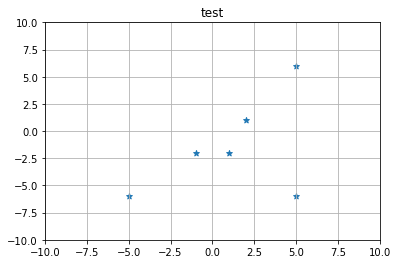

performance =  75.0 %


In [9]:
Acc1=[]

correct_x1=[]
correct_y1=[]

for record in test_data_list:  
    
    all_values1 = record.split(',') # 레코드를 쉼표에 의해 분리
        
    answer=int(float(all_values1[0]))
        
    # 입력 값의 범위와 값 조정
    inputs = numpy.asfarray(all_values1[1:3])/10 +0.01
        
    outputs=n.query(inputs)
        
    label=numpy.argmax(outputs)
        
    if((label+1)==answer):
        Acc1.append(1)
        correct_x1.append(int(all_values1[1]))
        correct_y1.append(int(all_values1[2]))
    else:
        Acc1.append(0)
        pass
        

    
plt.scatter(correct_x1,correct_y1,marker='*')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.title('test')
plt.grid()
plt.show()


Acc_array=numpy.asarray(Acc1)
print("performance = ", Acc_array.sum()/Acc_array.size*100,'%')

